In [2]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

In [12]:
df = pd.read_csv('https://raw.githubusercontent.com/farhansayyed165/Highway-Data/main/Data/Vehicles/Basic_CLassify.csv', index_col='Unnamed: 0')
y = df.filter(like="vehicle", axis=1)
X = df.drop('vehicle', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
d = pd.read_csv('https://raw.githubusercontent.com/farhansayyed165/Highway-Data/main/Data/Vehicles/Base_data.csv')

In [13]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
y_train.shape

(753, 1)

In [14]:
scaler= StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
clf = LogisticRegression(multi_class='multinomial', max_iter=150)
clf.fit(X_train_scaled, y_train.values.ravel())


LogisticRegression(max_iter=150, multi_class='multinomial')

In [16]:
y_pred = clf.predict(X_test)

In [17]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.28      0.26      0.27        39
           2       0.16      0.05      0.08        55
           3       0.60      0.06      0.11        50
           4       0.22      0.18      0.20        45
           5       0.04      0.03      0.03        35
           6       0.25      0.72      0.37        46
           7       0.09      0.08      0.09        36
           8       0.15      0.29      0.20        17

    accuracy                           0.20       323
   macro avg       0.22      0.21      0.17       323
weighted avg       0.24      0.20      0.17       323



In [18]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[10,  3,  1,  3,  8, 10,  1,  3],
       [ 1,  3,  0, 12,  1, 28,  8,  2],
       [11,  6,  3,  6,  7, 10,  4,  3],
       [ 1,  6,  0,  8,  1, 19,  5,  5],
       [ 7,  0,  0,  0,  1, 15,  6,  6],
       [ 0,  0,  0,  4,  0, 33,  5,  4],
       [ 2,  0,  0,  3,  7, 15,  3,  6],
       [ 4,  1,  1,  1,  0,  3,  2,  5]], dtype=int64)

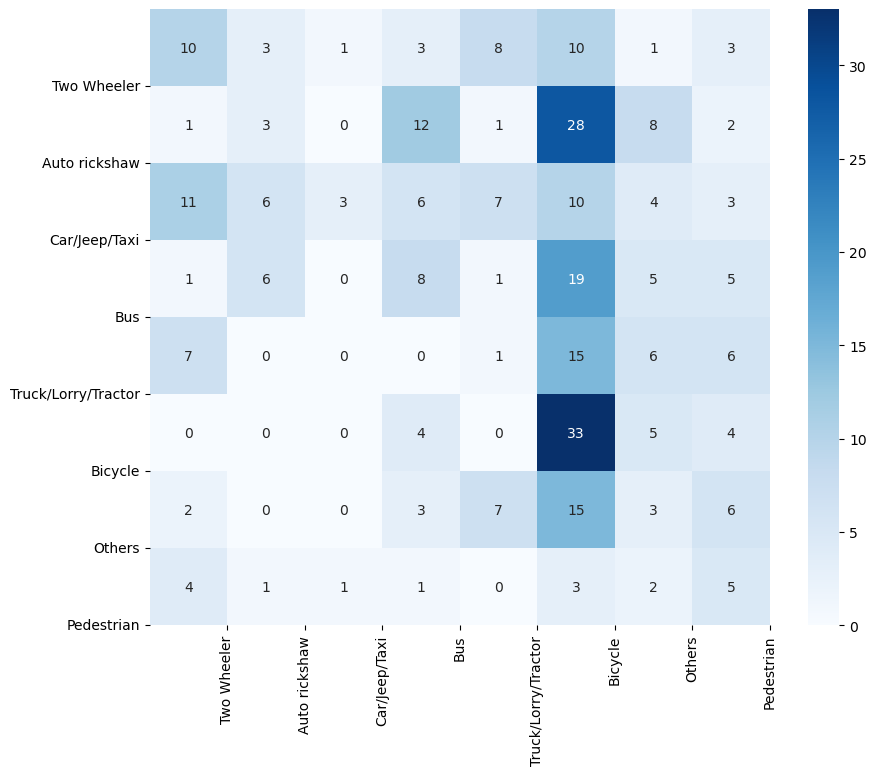

In [19]:
labels=d['Impacting Vehicle Type'].unique()
x=[1,2,3,4,5,6,7,8]
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, cmap="Blues")
plt.xticks(x, labels, rotation = 90)
plt.yticks(x, labels, rotation = 0)
plt.show()

In [20]:
accuracy_score(y_test,y_pred)

0.2043343653250774